# The Image Classification Dataset

The MNIST dataset is one of the widely used dataset for image classification, while it is too simple as a benchmark dataset. We will use the similar, but more complex Fashion-MNIST dataset

In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

Download and read it into memory using built-in framework utilities

In [3]:
class FashionMNIST(d2l.DataModule):  
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [4]:
data.train[0][0].shape

torch.Size([1, 32, 32])

Two utility functions to visualize the dataset

In [5]:
@d2l.add_to_class(FashionMNIST)  
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

Reads a minibatch of data with size `batch_size`

In [7]:
@d2l.add_to_class(FashionMNIST)  
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [8]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'4.69 sec'

In [9]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """Plot a list of images."""
    raise NotImplementedError

The images and their corresponding labels

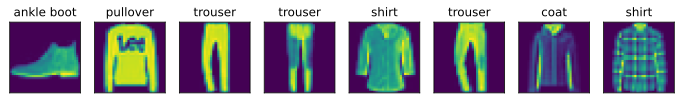

In [10]:
@d2l.add_to_class(FashionMNIST)  
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)